## Step1. Reading and Understanding the data

In [260]:
# Import the packages and classes 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [261]:
# We are naming raw dataframe as bike_raw
bike_raw = pd.read_csv("day.csv")

In [262]:
bike_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [263]:
bike_raw.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [264]:
raw_data_rows = bike_raw.shape[0]
print('No. of rows in Bike dataset : ',bike_raw.shape[0])
raw_data_col = bike_raw.shape[1]
print('No. of columns in Bike dataset : ',bike_raw.shape[1])

No. of rows in Bike dataset :  730
No. of columns in Bike dataset :  16


In [265]:
#Here can see, null values doesnt exist in our dataset

print(bike_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


## Cleaning Data
Drop columns that are not useful for analysis

In [266]:
variable_list = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']

variable_to_del = [x for x in bike_raw.columns if x not in variable_list ]

for i in variable_to_del:
   bike_raw =  bike_raw.drop(i, axis=1)

In [267]:
bike_raw.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [268]:
bike_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [269]:
bike_raw.shape

(730, 12)

In [270]:
#Find out the duplicates
bike_raw.drop_duplicates(inplace=True)
bike_raw.shape

(730, 12)

Since there is no any reduction in the number of rows which means there is no redundant data avilable

## Encoding the categorical variables

Since Season, Month, Weekday, Weathersit are categorical variables
So we will encode it will real name to understand it more precisely 

In [271]:
bike_raw['season'] = bike_raw.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

#bike_raw['yr'] = bike_raw.yr.map({0:2018, 1:2019})

bike_raw['mnth'] = bike_raw.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike_raw['weekday'] = bike_raw.weekday.map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur',5:'Fri',6:'Sat'})

bike_raw['weathersit'] = bike_raw.weathersit.map({1:'Clear',2:'Misty',3:'Light_Rain',4:'Heavy Rain'})

In [272]:
bike_raw.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [273]:
bike_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Step2. Visualizing the data to understand the data pattern

Visualizing the categorical variables
    * Season
    * Yr
    * Month
    * Holiday
    * Working day
    * Weathersit
    * Weekday

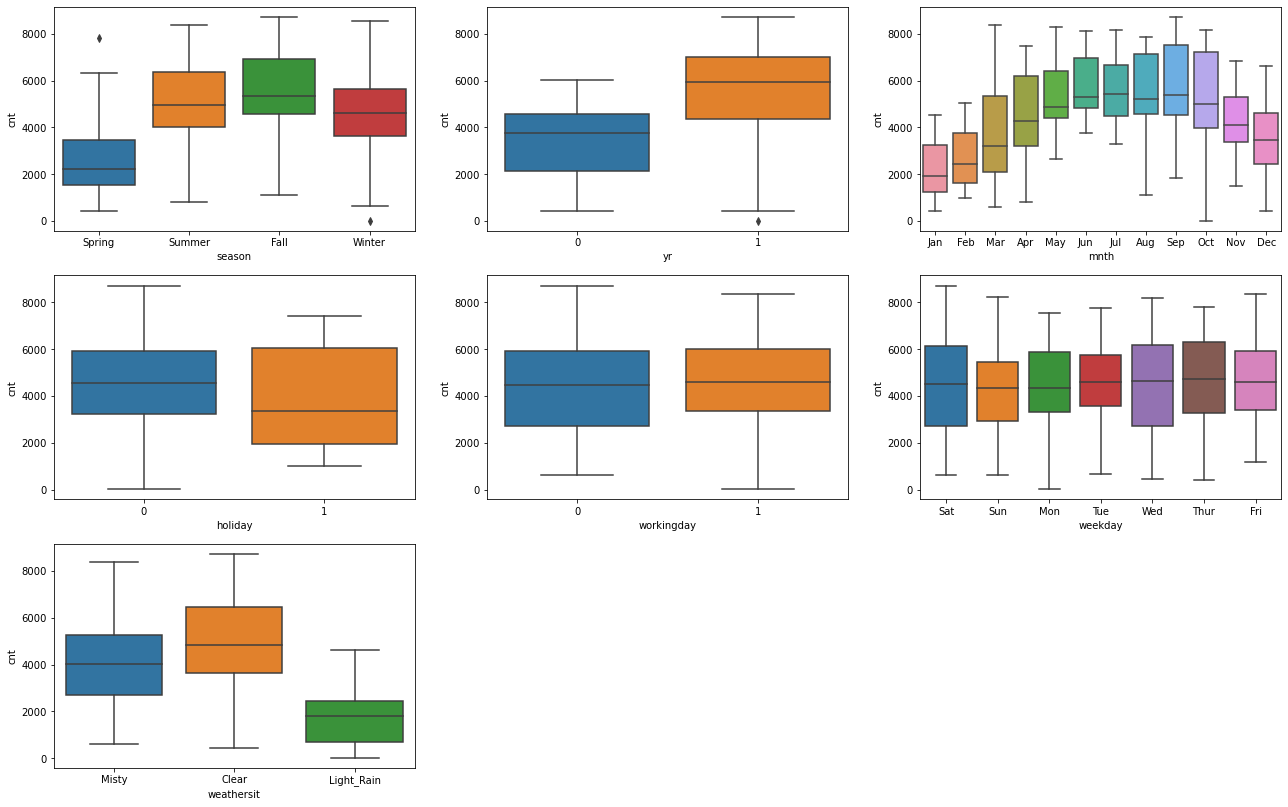

In [274]:
# Visulaizing independent variable against target variable (i.e count)

plt.figure(figsize=(22,14))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_raw)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_raw)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_raw)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_raw)

plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_raw)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_raw)

plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_raw)
plt.show()

In [275]:
def barplot_cat(col):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.barplot(col, 'cnt', data=bike_raw)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt', data= bike_raw, hue ='yr', palette='Set1')
    plt.legend(labels=['2018','2019'])
    plt.show()

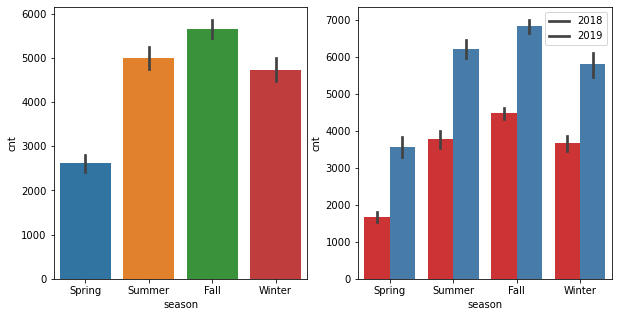

In [276]:
barplot_cat('season')

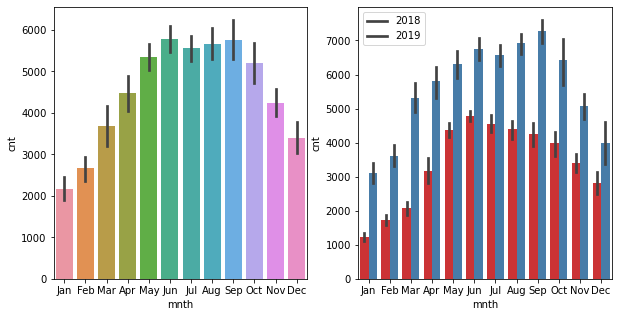

In [277]:
barplot_cat('mnth')

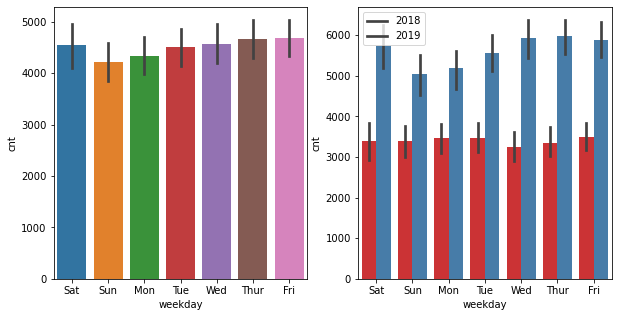

In [278]:
barplot_cat('weekday')

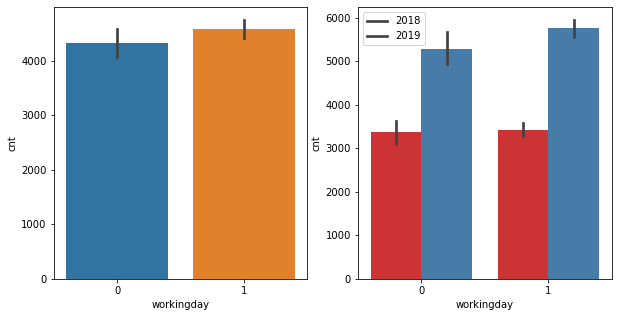

In [279]:
barplot_cat('workingday')

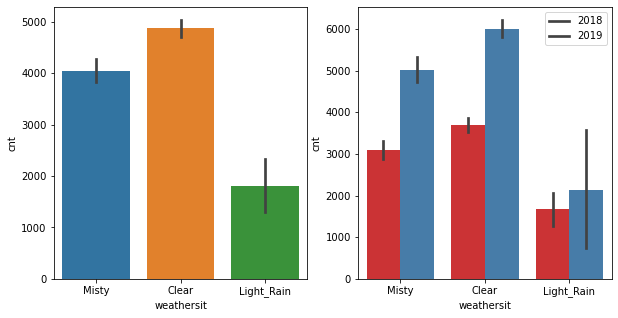

In [280]:
barplot_cat('weathersit')

<Figure size 720x864 with 0 Axes>

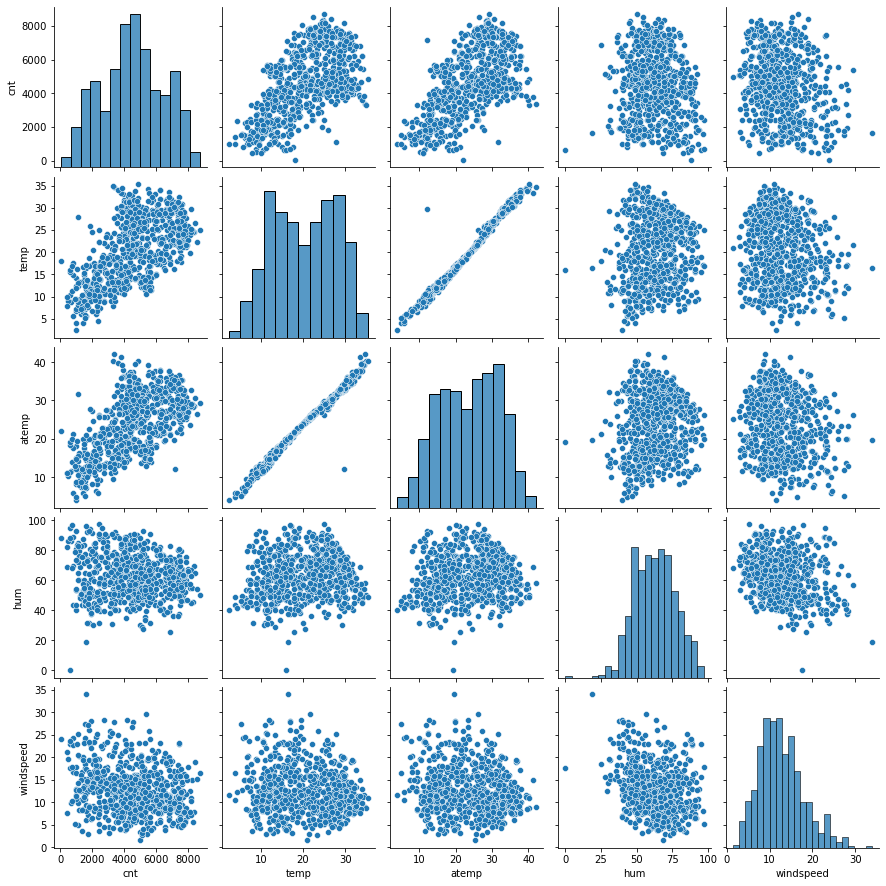

In [281]:
# Visualizing on numerical variables
#Some assumptions
#All variables should be continous
#There should be a linear relationship between the predictor and the predictant

plt.figure(figsize=(10,12))
sns.pairplot(data= bike_raw, vars= ['cnt','temp','atemp','hum','windspeed'])
plt.show()


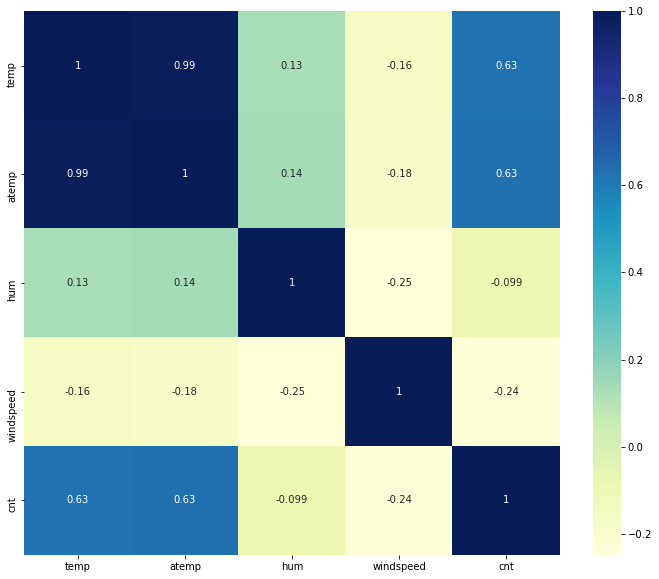

In [282]:
#check the correlation values between the variables
plt.figure(figsize=(12,10))
sns.heatmap(bike_raw[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap="YlGnBu", linecolor='Black')
plt.show()

In [283]:
bike_raw[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


We can see variables temp and atemp are highly correlated to each other.This is an example of multicollinearity. Later we will see how to deal with Multicollinearity

## Step3 : Data Preparation

Before we start with modeling, we need to make sure our all columns are in numeric.
In our dataset we have categorical variables like mnth, yr, weekday, season, weathersit, which are non-numeric.
So we need to dummy variable concept and make them in 0 and 1 representation.

In [284]:
bike_raw.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [285]:
bike_raw.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [286]:
def dummy_var(col):
    return pd.get_dummies(col, drop_first=True)
    
season_dummy = dummy_var(bike_raw.season)

mnth_dummy = dummy_var(bike_raw.mnth)

#yr_dummy = dummy_var(bike_raw.yr)

weekday_dummy = dummy_var(bike_raw.weekday)

weathersit_dummy = dummy_var(bike_raw.weathersit)

In [287]:
print(season_dummy)


     Spring  Summer  Winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]


Now we need to merge all new dummy variables with our actual data set

In [288]:
bike_transformed = pd.concat([bike_raw, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy], axis=1)

In [289]:
bike_transformed.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Rain,Misty
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [290]:
bike_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Spring      730 non-null    uint8  
 13  Summer      730 non-null    uint8  
 14  Winter      730 non-null    uint8  
 15  Aug         730 non-null    uint8  
 16  Dec         730 non-null    uint8  
 17  Feb         730 non-null    uint8  
 18  Jan         730 non-null    uint8  
 19  Jul         730 non-null    u

Since we have already created dummy variables and merged with our raw dataset, now we need to remove redundant columns like season, mnth, yr, wearhersit

In [291]:
bike_transformed.drop(['season','mnth','weathersit','weekday'], axis=1,inplace= True)

In [292]:
bike_transformed.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Rain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


Now we have transformed our data and finalised with 30 columns 

## Step4. Splitting data into Training and Testing sets


In [293]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_transformed, train_size=0.7, random_state=100)

In [294]:
# Since we have assigned training as 70% of the raw data, so we have 510 records 
bike_train.shape

(510, 30)

In [295]:
# Since we have assigned training as 30% of the raw data, so we have 220 records 
bike_test.shape

(220, 30)

Since we have completed with separating data into train and test.Now we have to scale train dataset.
From our dataset we can see magnitude of variables like windspeed, cnt, temp are not comparable. Making a model on such data would result in wrong prediction so we need to scale all these numeric columns in same scale.

In [296]:
scaler = MinMaxScaler()



In [297]:
#Now we need to apply Feature scaling on continuous numeric columns 
 
num_variable = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_variable] = scaler.fit_transform(bike_train[num_variable])

In [298]:
bike_train[num_variable].head()

,temp,atemp,hum,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [299]:
bike_train[num_variable].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Rain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


We can check and identify correlation between independent and dependent variables

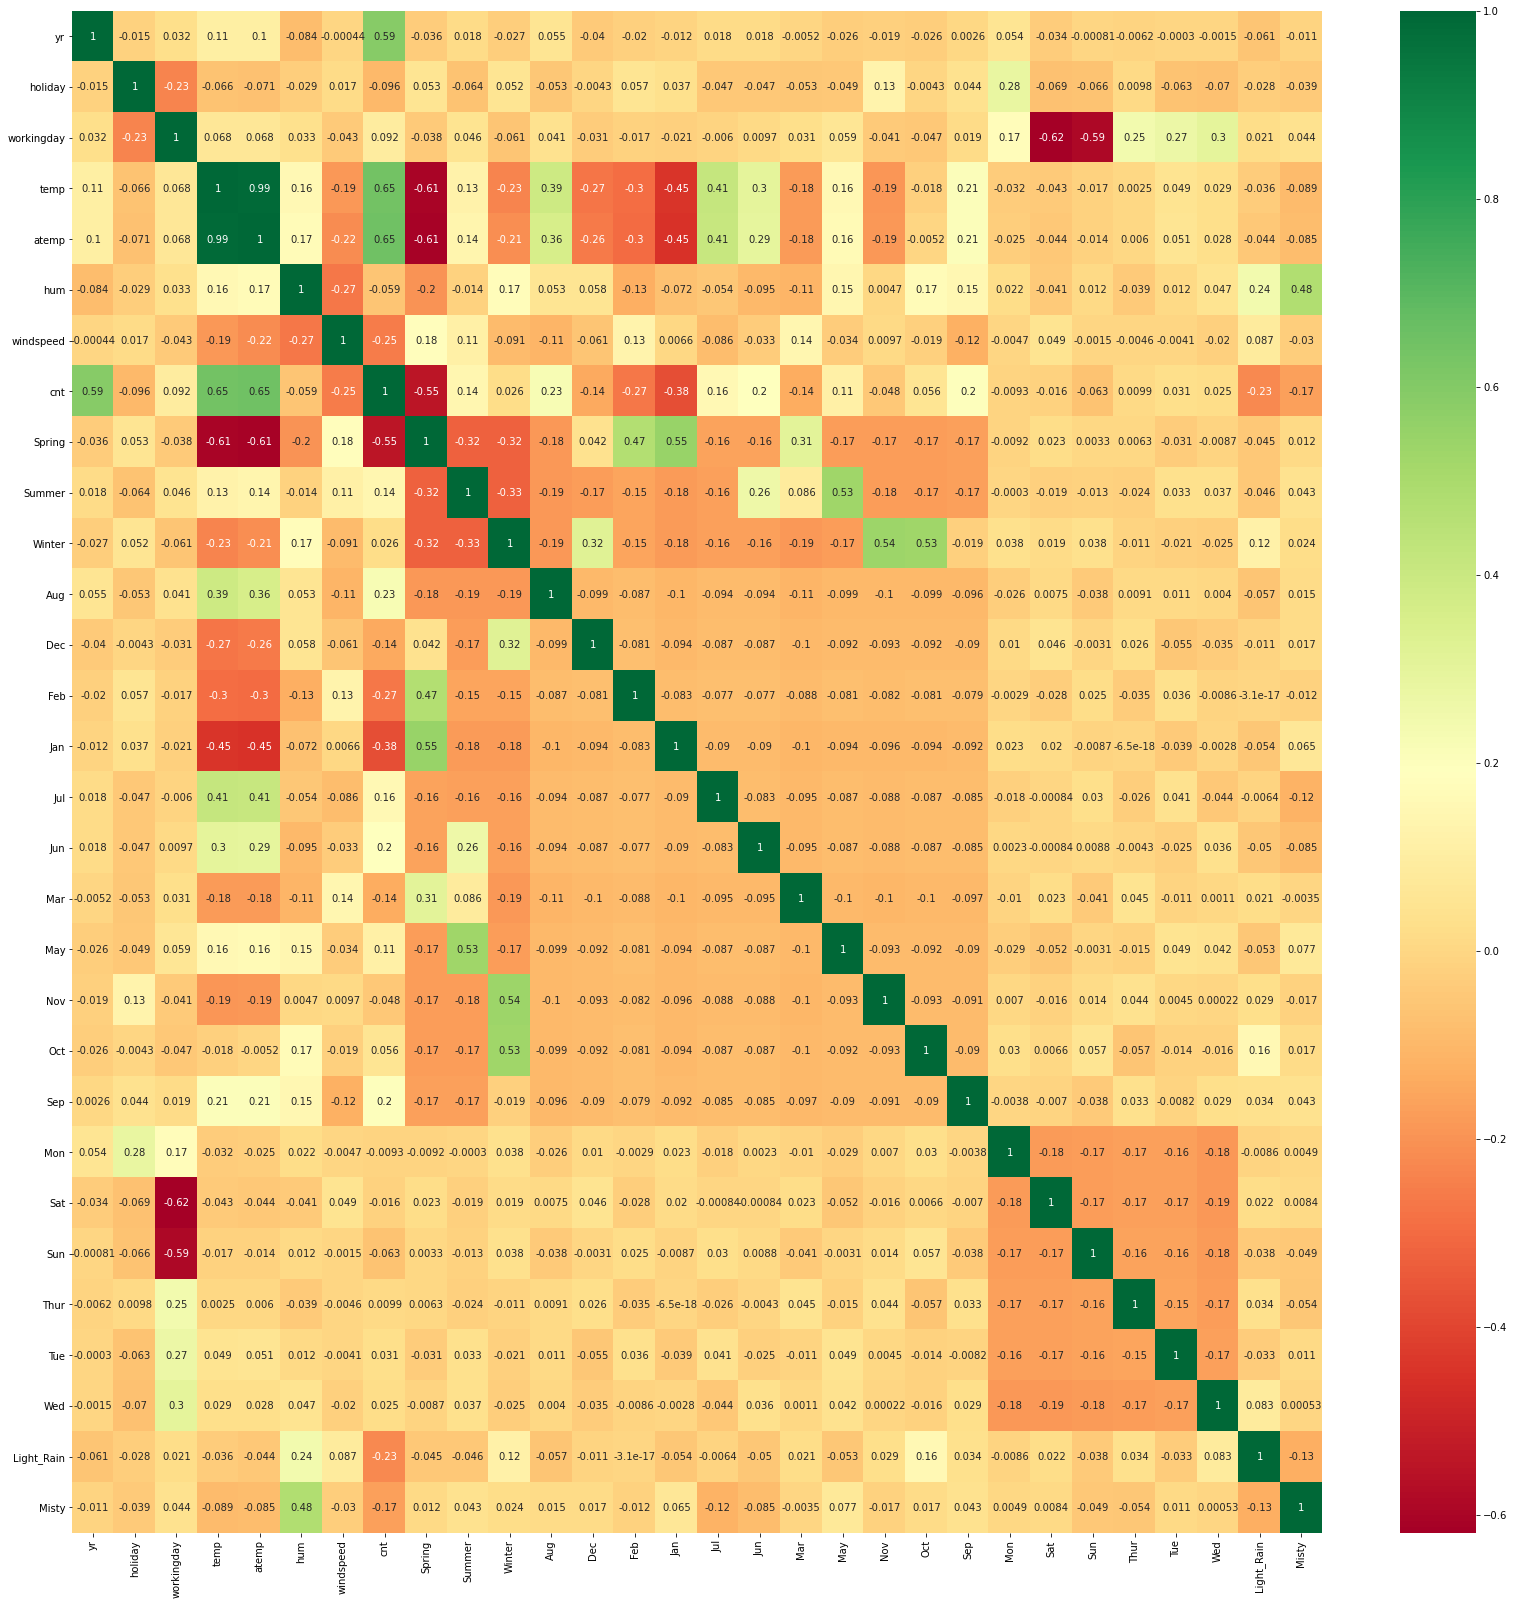

In [301]:
plt.figure(figsize=(28,28))
sns.heatmap(bike_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

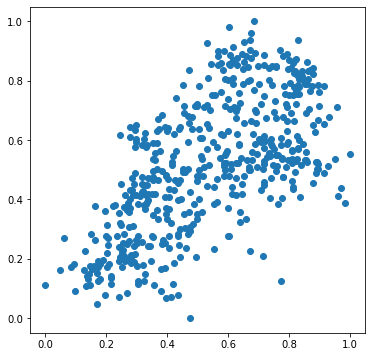

In [302]:
plt.figure(figsize=(6,6))

plt.scatter(data = bike_train,x='temp', y='cnt')
plt.show()


In above visualization, we can see there is a linear relationship between temp and cnt

Building the linear model

In [303]:
# Dividing data into independent and dependent variables

y_train = bike_train.pop('cnt')
X_train = bike_train

In [304]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [305]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Rain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Since we have 29 features in our transformed dataset so we need to check if there multicollinearilty exists between independent variables

In [306]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [307]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thur', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light_Rain', True, 1),
 ('Misty', True, 1)]

In [308]:
# RFE has automatocally removed columns with high multicollinearity

true_col = X_train.columns[rfe.support_]

print(true_col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Light_Rain', 'Misty'],
      dtype='object')


In [309]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [310]:
# Generic function to calculate VIF of variables

def calc_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False )
    return vif

In [311]:
X_train_rfe = bike_train[true_col]

In [312]:
calc_VIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.46
7,Summer,2.85
14,Misty,2.29
0,yr,2.09
12,Sat,1.98


## Step5. Building a linear model

### In order to find correct features based on VIF and p-value, we have to create multiple linear model and analyze the summary from statsmodel

In [313]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.22e-191
Time:                        15:54:59   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.0

In [314]:
# As humidity variable shows very high VIF, we can drop it and then again check the new Summary and VIF list

X_train_new = X_train_rfe.drop(['hum'], axis =1)

calc_VIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,Spring,3.07
6,Summer,2.34
0,yr,2.08
7,Winter,1.98
11,Sat,1.97
8,Jan,1.62
9,Jul,1.59


Still VIF for temp variable high, lets try to check the summary

In [315]:
X_train_lm2 = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.60e-188
Time:                        15:55:01   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.0

In [316]:
# We know temp is good for our case study so we will try to keep it and remove other variable and see if VIF of temp becomes <5.
# In this case we will remove hum variable as VIF>5

X_train_new = X_train_new.drop(['holiday'], axis =1) 
#workingday
calc_VIF(X_train_new)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,Spring,2.99
5,Summer,2.33
0,yr,2.08
6,Winter,1.91
10,Sat,1.84
7,Jan,1.62
8,Jul,1.59


In [317]:
X_train_lm3 = sm.add_constant(X_train_new)

lr3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.68e-189
Time:                        15:55:03   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1657      0.031      5.292      0.0

In [318]:
X_train_new = X_train_new.drop(['Jan'],axis=1)

calc_VIF(X_train_new)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,Spring,2.38
5,Summer,2.32
0,yr,2.07
6,Winter,1.91
9,Sat,1.83
7,Jul,1.58
11,Misty,1.57


In [319]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.12e-189
Time:                        15:55:05   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

In [320]:
X_train_new = X_train_new.drop(['Jul'],axis=1)

calc_VIF(X_train_new)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,Spring,2.30
0,yr,2.07
5,Summer,2.00
8,Sat,1.83
6,Winter,1.76
10,Misty,1.57
7,Sep,1.23


In [321]:
X_train_lm5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.42e-188
Time:                        15:55:06   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.031      4.597      0.0

In [322]:
X_train_new = X_train_new.drop(['Spring'],axis=1)

calc_VIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,Sat,1.69
4,Summer,1.57
9,Misty,1.53
5,Winter,1.40
6,Sep,1.20
8,Light_Rain,1.08


In [323]:
X_train_lm6 = sm.add_constant(X_train_new)

lr6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.13e-188
Time:                        15:55:08   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

## Since we have got our final predictor or independent variables, now we can move ahead and perform Residual Analysis

## Step6. Residual Analysis of trained data


### Validation #1

In [324]:
X_train_lm6.head()

,const,yr,workingday,temp,windspeed,Summer,Winter,Sep,Sat,Light_Rain,Misty
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,0,1
111,1.0,0,1,0.345824,0.380981,1,0,0,0,0,1


In [325]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0.98, 'Error Terms')

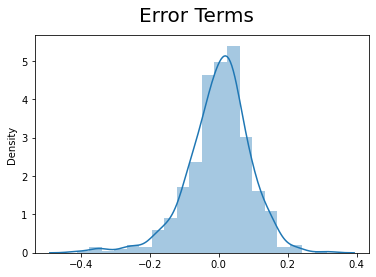

In [326]:
# Now we need to check is residuals are normally distributed

fig = plt.figure()
sns.distplot(y_train - y_train_pred, bins= 20)
fig.suptitle('Error Terms', fontsize = 20)

### Validation #2

MulitCollinearity 

In [327]:
calc_VIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,Sat,1.69
4,Summer,1.57
9,Misty,1.53
5,Winter,1.40
6,Sep,1.20
8,Light_Rain,1.08


In [328]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.13e-188
Time:                        15:55:17   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.019      4.031      0.0

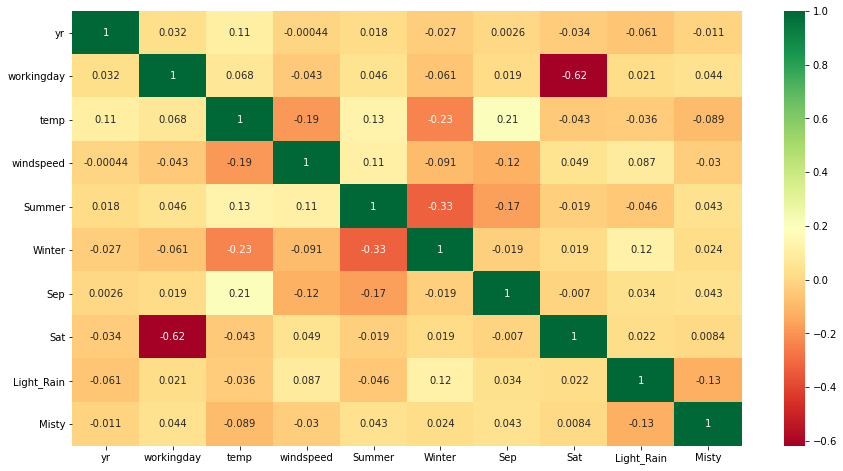

In [329]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(), annot =True,cmap="RdYlGn" )
plt.show()

As per above heatmap we can see there is no high correlation exists between predictors or independent variables.

### Linearity

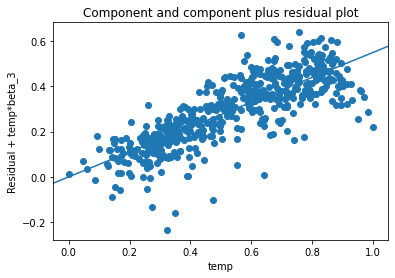

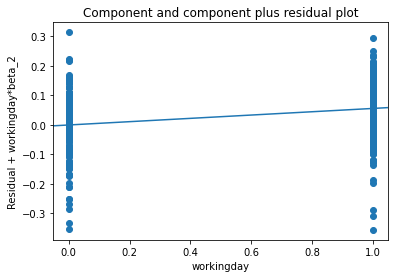

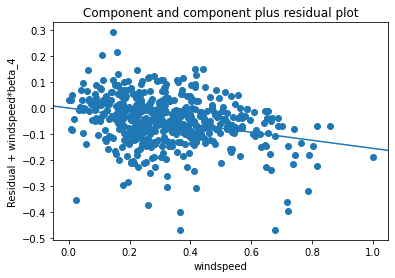

In [347]:
#Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr6, 'workingday')
plt.show()

sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

### Homoscedasticity

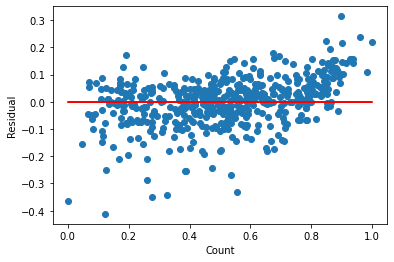

In [330]:
y_train_pred = lr6.predict(X_train_lm6)
res = y_train - y_train_pred
plt.scatter(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Autocorelation

### Step7 : Making Predictions using the Final Model

In [331]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Summer', 'Winter', 'Sep',
       'Sat', 'Light_Rain', 'Misty'],
      dtype='object')

In [332]:
#X_train_new.columns
bike_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur',
       'Tue', 'Wed', 'Light_Rain', 'Misty'],
      dtype='object')

In [333]:
num_variable_final = ['temp','windspeed','atemp','hum','cnt']

bike_test[num_variable_final] = scaler.transform(bike_test[num_variable_final])

bike_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thur',
       'Tue', 'Wed', 'Light_Rain', 'Misty'],
      dtype='object')

In [334]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light_Rain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.249896,1.896308,0.226951,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.085335,0.462995,0.130569,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.050926,0.724590,-0.064404,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.176110,1.556837,0.133311,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.254530,1.856980,0.216178,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.320731,2.225046,0.300118,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.425781,3.029478,0.631282,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [335]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [336]:
# Now we need to remove columns from the test dataset as from the trained model we know most of the columns are insignificant 

col_trained = X_train_new.columns

X_test = X_test[col_trained]

X_test.head()

,yr,workingday,temp,windspeed,Summer,Winter,Sep,Sat,Light_Rain,Misty
184,0,0,0.831783,0.039527,0,0,0,0,0,1
535,1,1,0.901354,0.096398,1,0,0,0,0,0
299,0,1,0.511964,0.244062,0,1,0,0,0,1
221,0,1,0.881625,0.248450,0,0,0,0,0,0
152,0,1,0.817246,0.410323,1,0,0,0,0,0


In [337]:
# Need to add a constant to X_test dataframe

X_test_lm6 = sm.add_constant(X_test)


y_pred = lr6.predict(X_test_lm6)

In [338]:
r2 = r2_score(y_test,y_pred)
round(r2,4)

0.795

In [339]:
r2_score(y_test,y_pred)

0.7950193165302468

### Step8 : Model Evaluation

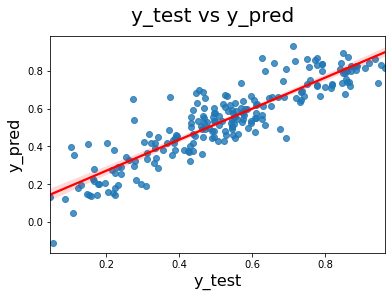

In [340]:
fig = plt.figure()
sns.regplot(x=y_test,y=y_pred, fit_reg=True,line_kws={"color":"red"})
fig.suptitle('y_test vs y_pred', fontsize= 20)
plt.xlabel('y_test', fontsize= 16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [341]:
round(lr6.params,4)

const         0.0750
yr            0.2331
workingday    0.0561
temp          0.5499
windspeed    -0.1552
Summer        0.0886
Winter        0.1307
Sep           0.0974
Sat           0.0675
Light_Rain   -0.2871
Misty        -0.0800
dtype: float64

So our final Linear equation will be given by :
    
cnt = 0.0750 + 0.2331*yr + 0.0561*workingday + 0.5499*temp - 0.1552*windspeed + 0.0886*Summer + 0.1307*Winter + 0.0974*Sep + 0.0675*Sat - 0.2871*Light_Rain - 0.0800*Misty

In [342]:
# Now we can calculate Adjusted R^2 value for test data set

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7852


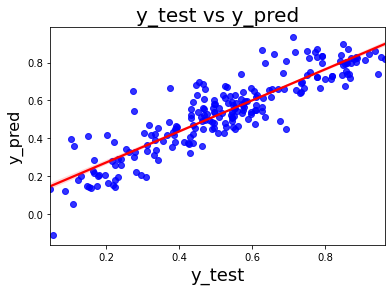

In [343]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparison between Training and Test data set

Summary of Training and Test dataset:
    Train Dataset R^2 : 0.835
    Test Dataset R^2 : 0.795
    
    Train Dataset Adjusted R^2 :0.832
    Test Dataset Adjusted R^2 : 0.7852